<a href="https://colab.research.google.com/github/gehena/Pemrograman-Python-/blob/main/Ghehena%20Latipah%20Adha%20Sahara%20(FCN/CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101180276_Ghehena Latipah Adha Sahara(CATATAN).pdf'
'1101180276-Ghehena Latipah Adha Sahara-Quiz1dan2-dikonversi.pdf'
'1101180276_Ghehena Latipah Adha Sahara_Tugas Latihan Soal (1).pdf'
'1101180276_Ghehena Latipah Adha Sahara_Tugas Latihan Soal.pdf'
'1101180276_Ghehena Latipah Adha Sahara(TUGAS).pdf'
 AlasPersegiPanjang.java
 bintang.webp
'BUKTI DAFTAR KEGIATAN KEPANITIAAN'/
'BUKTI KEGIATAN KEPANITIAAN'/
'BUKTI SKTM'/
 Classroom/
'Colab Notebooks'/
'Cover TP Reguler 2020.docx'
'Cover TP Reguler 2020.gdoc'
'Cover TP Reguler 2020.pdf'
'datar hadir.xlsx'
 dataset@
 daun.jpg
'Death Cash Episode 06 [MMSubs.com].mkv'
'Death Cash Episode 07 [MMSubs.com].mkv'
'Death Cash Episode 08 [MMSubs.com].mkv'
'Death Cash Episode 09 [MMSubs.com].mkv'
'Death Cash Episode 10 END [MMSubs.com].mkv'
'Doctor Y - Gekai Kaji Hideki SP 720p HDTV [SubIndo].mp4'
 Drivekun/
 e28ec678582a5c5cdfc748f7916d7716.mp4
 e36d1beaa7a755ba0b5a76d03fe50cf0.mp4
 enen-no-shouboutai_15_SUB_ITA_360p.mp4
 filemanager.work/
'FORM P

In [4]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [5]:
#grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 128x128 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [7]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 128, 128, 3)
(352, 128, 128, 3)


In [11]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1440100   
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

In [12]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 8s 476ms/step - loss: 2.6266 - accuracy: 0.0863 - val_loss: 2.4678 - val_accuracy: 0.1108
Epoch 2/25
17/17 [==============================] - 8s 469ms/step - loss: 2.4262 - accuracy: 0.1886 - val_loss: 2.3499 - val_accuracy: 0.2415
Epoch 3/25
17/17 [==============================] - 8s 477ms/step - loss: 2.2283 - accuracy: 0.2607 - val_loss: 2.0861 - val_accuracy: 0.3210
Epoch 4/25
17/17 [==============================] - 8s 473ms/step - loss: 1.9232 - accuracy: 0.3536 - val_loss: 1.8466 - val_accuracy: 0.3835
Epoch 5/25
17/17 [==============================] - 8s 479ms/step - loss: 1.6104 - accuracy: 0.4891 - val_loss: 1.5725 - val_accuracy: 0.4517
Epoch 6/25
17/17 [==============================] - 8s 480ms/step - loss: 1.3714 - accuracy: 0.5431 - val_loss: 1.5278 - val_accuracy: 0.4688
Epoch 7/25
17/17 [==============================] - 8s 479ms/step - loss: 1.2034 - accuracy: 0.6265 - val_loss: 1.3897 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


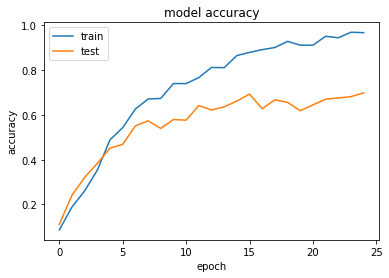

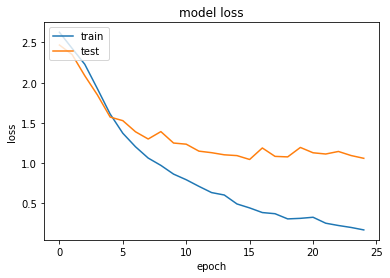

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)

[INFO] evaluating network...


In [15]:
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_01       0.68      0.73      0.70        26
      GMB_02       0.68      0.53      0.60        32
      GMB_03       0.71      0.88      0.79        25
      GMB_04       0.75      0.48      0.59        31
      GMB_05       0.63      0.63      0.63        30
      GMB_06       0.63      0.61      0.62        28
      GMB_07       0.69      0.71      0.70        31
      GMB_08       0.86      0.69      0.77        26
      GMB_09       0.76      0.80      0.78        20
      GMB_10       0.79      0.67      0.72        33
      GMB_11       0.58      0.74      0.65        34
      nonGMB       0.74      0.94      0.83        36

    accuracy                           0.70       352
   macro avg       0.71      0.70      0.70       352
weighted avg       0.71      0.70      0.69       352



In [16]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [17]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

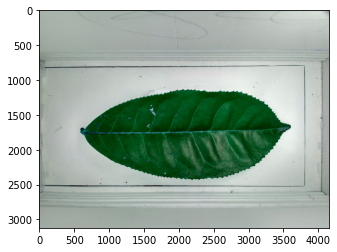

In [18]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [20]:
image_testing = Image.open ('daun.jpg')
image_testing = np.array(image_testing.resize((128,128))) / 255.0
image_testing.shape

(128, 128, 3)

In [21]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [22]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.3811171e-04 1.8903228e-07 2.8131979e-11 3.8212711e-05 9.8327565e-01
  8.3165090e-05 1.6024254e-02 6.6210362e-08 9.2834176e-07 2.9245129e-07
  3.0502156e-04 3.4009459e-05]]
['GMB_05']
